# Example of using the `Streetscape` class

The usage on the French data from Alessandro.

In [1]:
import warnings

import geopandas as gpd
import numpy as np
import momepy
import rioxarray
import xvec

from streetscape import Streetscape

You can skip this but these warnings are annoying on macOS and mean nothing.

In [2]:
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in intersection",
)

Read all the data. Only streets and buildings are required.

In [3]:
streets = gpd.read_file("/data/uscuni-streetscape/data_from_marek/select/gdf_streets_select.gpkg")
buildings = gpd.read_file("/data/uscuni-streetscape/data_from_marek/select/gdf_buildings_select.gpkg")
plots = gpd.read_file("/data/uscuni-streetscape/data_from_marek/select/gdf_parcels_select.gpkg")
dtm = rioxarray.open_rasterio("/data/uscuni-streetscape/data_from_marek/dtm/dtm_raw/RGEALTI_FXX_1025_6285_MNT_LAMB93_IGN69.asc")

Initiate the class. This will dricectly compute builk of the sightline indicators based on streets and buildings.

In [5]:
%%time
sc = Streetscape(streets, buildings, category_col="inbiac_clu", height_col="H")

CPU times: user 2min 56s, sys: 79.8 ms, total: 2min 56s
Wall time: 2min 56s


If you have plots and DTM, you can use two additional methods to compute additional variables.

In [6]:
%time sc.compute_plots(plots)
%time sc.compute_slope(dtm)

CPU times: user 1min 35s, sys: 27 ms, total: 1min 35s
Wall time: 1min 35s
CPU times: user 7.96 s, sys: 15 ms, total: 7.97 s
Wall time: 7.97 s


The resulting data can be extracted either on a street level:

In [7]:
%time street_df = sc.street_level()
street_df.head()

CPU times: user 18.5 s, sys: 7 ms, total: 18.5 s
Wall time: 18.5 s


,N,n_l,n_r,left_OS,right_OS,OS,left_OS_STD,right_OS_STD,OS_STD,left_OS_MAD,...,left_plot_WD_ratio,right_plot_WD_ratio,plot_WP_ratio,left_plot_WP_ratio,right_plot_WP_ratio,slope_degree,slope_percent,n_slopes,slope_valid,geometry
street_index,,,,,,,,,,,,,,,,,,,,,
0,28,23,18,24.311599,33.694404,58.006004,14.046756,18.123685,16.065797,11.199582,...,2.068655,19.069020,0.257545,0.157574,0.134635,2.305050,0.040300,28,True,"LINESTRING (1025242.3 6281649.6, 1025250.6 628..."
1,33,25,31,30.209051,19.073379,49.282429,18.104801,11.540920,15.064606,16.332799,...,23.732453,2.111628,0.267445,0.134863,0.136822,1.094379,0.019111,33,True,"LINESTRING (1025177.5 6281541.1, 1025187.2 628..."
2,15,7,10,32.085333,36.509089,68.594422,20.266936,11.752714,16.278026,19.108978,...,0.968932,0.846054,0.097734,0.114727,0.080742,3.159987,0.055233,15,True,"LINESTRING (1025424.8 6281581.9, 1025442.8 628..."
3,34,33,30,15.669060,21.590872,37.259932,10.556142,18.156830,14.739725,7.966886,...,1.772884,1.147032,0.178996,0.126860,0.168291,2.404723,0.042030,34,True,"LINESTRING (1025476 6281507.8, 1025472.8 62814..."
4,13,12,12,12.466179,11.010357,23.476536,13.987317,11.982083,12.760226,10.377964,...,1.090780,0.739932,0.195982,0.198427,0.193536,0.878624,0.015341,13,True,"LINESTRING (1025216 6281670.9, 1025207.7 62816..."


It is a GeoDataFrame, so you can directly plot it.

<Axes: >

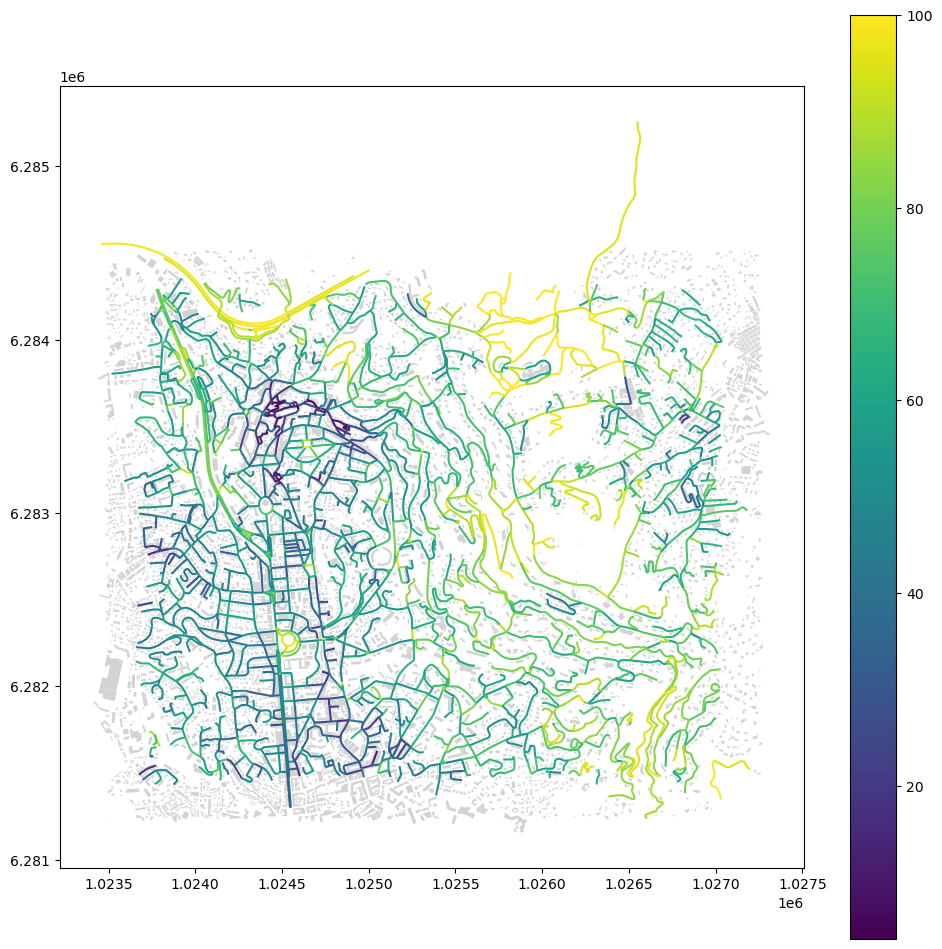

In [12]:
ax = street_df.plot("OS", figsize=(12, 12), legend=True)
buildings.plot(ax=ax, color="lightgray")

Or for all individual sightline points.

In [13]:
%time point_df = sc.point_level()
point_df.head()

CPU times: user 1.84 s, sys: 7 ms, total: 1.85 s
Wall time: 1.85 s


,geometry,left_OS_count,left_OS,left_SB_count,left_SB,left_H,left_HW,left_BUILT_COVERAGE,right_OS_count,right_OS,...,right_plot_SEQ_SB_depth,OS_count,OS,SB_count,SB,H,HW,BUILT_COVERAGE,plot_SEQ_SB,plot_SEQ_SB_depth
street_index,,,,,,,,,,,,,,,,,,,,,
0,POINT (1025242.675 6281649.27),1.0,50.0,0.0,NaN,NaN,NaN,0.0,1.0,40.214093,...,4.532115,2.0,45.107047,1.0,40.214093,9.8,0.243696,4.892953,40.441621,4.532115
0,POINT (1025244.992 6281647.232),1.0,50.0,0.0,NaN,NaN,NaN,0.0,1.0,50.000000,...,1.347396,2.0,50.000000,0.0,NaN,NaN,NaN,0.000000,20.582634,20.768754
0,POINT (1025247.309 6281645.194),1.0,50.0,0.0,NaN,NaN,NaN,0.0,1.0,50.000000,...,1.490866,2.0,50.000000,0.0,NaN,NaN,NaN,0.000000,5.736469,35.489073
0,POINT (1025249.626 6281643.157),1.0,50.0,0.0,NaN,NaN,NaN,0.0,2.0,50.000000,...,1.531753,3.0,50.000000,0.0,NaN,NaN,NaN,0.000000,3.356873,1.531753
0,POINT (1025252.086 6281641.304),1.0,50.0,0.0,NaN,NaN,NaN,0.0,1.0,8.827361,...,1.482066,2.0,29.413680,1.0,8.827361,18.8,2.129742,15.322779,3.171082,1.482066


Again, it is a GeoDataFrame, this time with point geometry.

<Axes: >

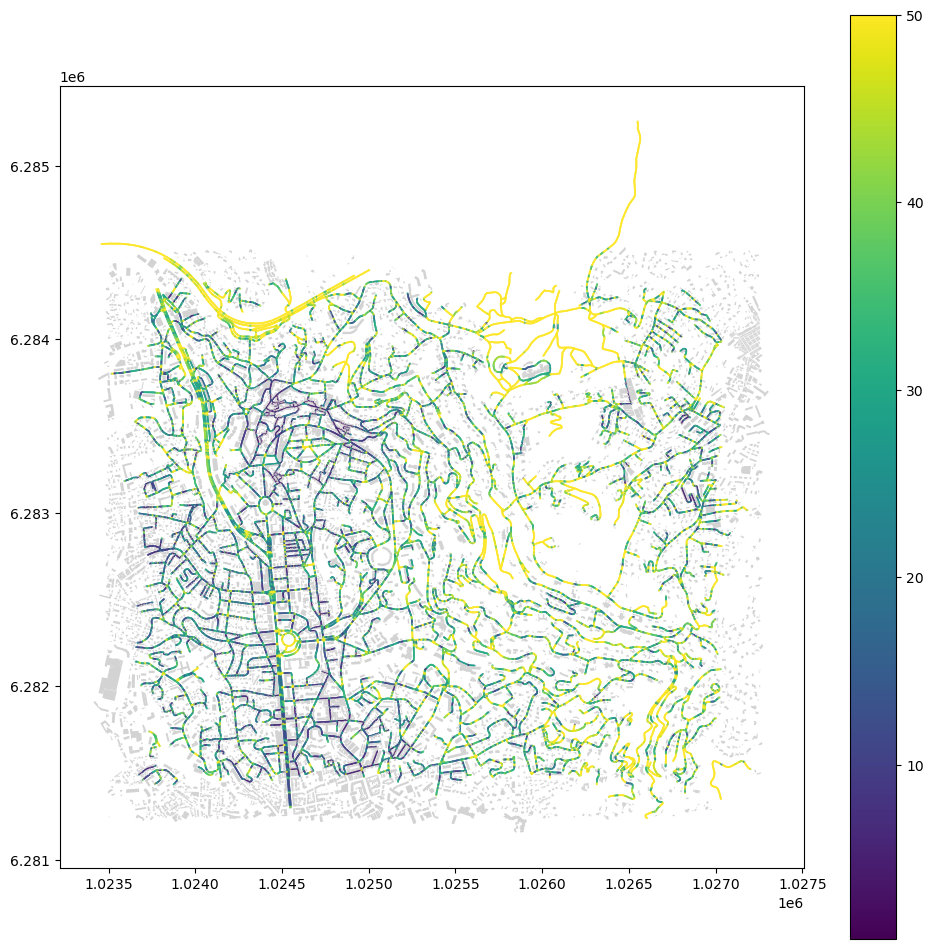

In [16]:
ax = point_df.plot("OS", figsize=(12, 12), legend=True, markersize=.1)
buildings.plot(ax=ax, color="lightgray")